# Convolutional neural network for image classification

## Importing the libraries

In [4]:
import cv2
import numpy as np
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import save_model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
tf.__version__

'2.5.0'

## Loading the images

In [3]:
path = '../material/Datasets/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

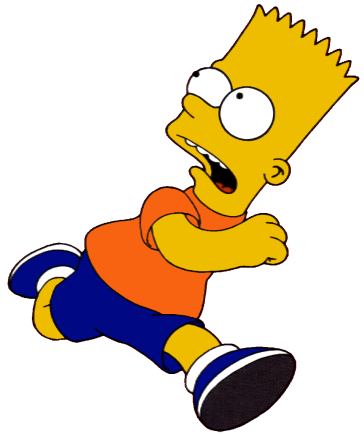

In [5]:
tf.keras.preprocessing.image.load_img('./homer_bart_2/training_set/bart/bart100.bmp')

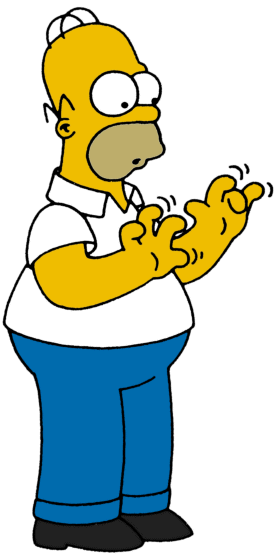

In [6]:
tf.keras.preprocessing.image.load_img('./homer_bart_2/training_set/homer/homer100.bmp')

## Train and test set

In [12]:
# We can configure some parameters to make modifications to the original images, 
# which is very useful when we have few images of each class. 
# As you can see here, there are many other parameters that can be configured. 
# Using this function, in addition to the original images, we will also have new images 
# with application of these pre-processing
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
# Indicates that the images will be accessed every eight. As we have few images, we put this small value

# As the name suggests, this parameter will mix the images, 
# they will be accessed in a completely random order to prevent the neural network 
# from memorizing the order of the images. Otherwise, the neural network could 
# learn the order of the images and not their features
train_dataset = training_generator.flow_from_directory('./homer_bart_2/training_set',
                                                        target_size = (128, 128),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)

Found 215 images belonging to 2 classes.


In [13]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [15]:
# To test, we set this parameter to FALSE because when testing, 
# the order of the images makes no difference. 
# If we leave the value equals TRUE, we will not be able to associate the 
# predictions with the expected outputs
test_generator = ImageDataGenerator(rescale=1./255) # for normalizing
test_dataset = test_generator.flow_from_directory('./homer_bart_2/test_set',
                                                     target_size = (128, 128),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 54 images belonging to 2 classes.


## Building and training the neural network

In [16]:
128 * 128

16384

In [ ]:
14 * 14 * 32

6272

In [ ]:
(6272 + 2) / 2

3137.0

In [34]:
network = Sequential()
network.add(Conv2D(64, (5,5), input_shape = (128,128,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(64, (5,5), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(64, (5,5), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))


network.add(Flatten())

network.add(Dense(units = 2305, activation='relu'))
network.add(Dense(units = 2305, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

In [35]:
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 124, 124, 64)      4864      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 58, 58, 64)        102464    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 64)        102464    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)             

In [36]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [37]:
history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)

/Users/mz195/Library/Python/3.8/lib/python/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
27/27 [==============================] - 7s 243ms/step - loss: 0.8564 - accuracy: 0.5767 - val_loss: 0.6184 - val_accuracy: 0.5185
Epoch 2/50
27/27 [==============================] - 7s 246ms/step - loss: 0.6124 - accuracy: 0.6279 - val_loss: 0.6029 - val_accuracy: 0.6667
Epoch 3/50
27/27 [==============================] - 7s 249ms/step - loss: 0.5204 - accuracy: 0.7349 - val_loss: 0.9311 - val_accuracy: 0.6111
Epoch 4/50
27/27 [==============================] - 7s 251ms/step - loss: 0.4451 - accuracy: 0.7721 - val_loss: 0.3842 - val_accuracy: 0.8333
Epoch 5/50
27/27 [==============================] - 7s 251ms/step - loss: 0.3957 - accuracy: 0.8140 - val_loss: 0.4414 - val_accuracy: 0.7778
Epoch 6/50
27/27 [==============================] - 7s 249ms/step - loss: 0.4801 - accuracy: 0.7349 - val_loss: 0.4454 - val_accuracy: 0.8148
Epoch 7/50
27/27 [==============================] - 7s 251ms/step - loss: 0.4089 - accuracy: 0.8186 - val_loss: 0.3996 - val_accuracy: 0.8519
Epoch 

## Evaluating the neural network

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

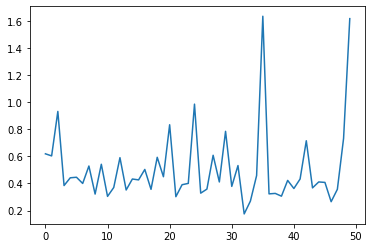

In [39]:
plt.plot(history.history['val_loss']);

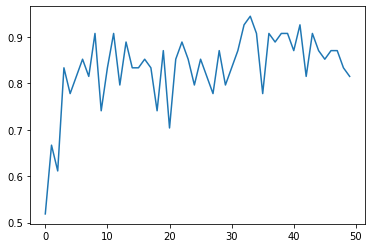

In [40]:
plt.plot(history.history['val_accuracy']);

In [41]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [42]:
predictions = network.predict(test_dataset)

In [43]:
predictions = np.argmax(predictions, axis = 1)

In [44]:
accuracy_score(test_dataset.classes, predictions)

0.8148148148148148

<AxesSubplot:>

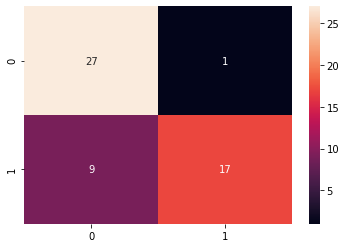

In [45]:
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [46]:
# The neural network can correctly identify 75% of the bart images and when it 
# identifies these bart images, it is correct 68% of the time
# We can conclude that this neural network is better for classifying bart images, as 
# we saw in the confusion matrix
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        28
           1       0.94      0.65      0.77        26

    accuracy                           0.81        54
   macro avg       0.85      0.81      0.81        54
weighted avg       0.84      0.81      0.81        54



## Saving and loading the model

In [ ]:
# This step is very important, because when you are satisfied with the results you 
# can save the model to use at another time (as the neural network training can take,
# there is no need to train the algori. Assuming you are a consultant to a company, 
# you create the neural network and send the weights to the developers to put the 
# neural network into production (a graphical interface could be made for example)

In [47]:
model_json = network.to_json()
with open('network.json','w') as json_file:
    json_file.write(model_json)

In [49]:
network_saved = save_model(network, './weights.hdf5')

In [50]:
with open('network.json', 'r') as json_file:
    json_saved_model = json_file.read()

In [51]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [52]:
network_loaded.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 124, 124, 64)      4864      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 58, 58, 64)        102464    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 64)        102464    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)             